In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Community_Crime_Statistics_20240522.csv")
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


Data Preprocessing

In [4]:
df.shape

(70661, 5)

Here we have bearly 70661 records and 5 columns. Therefore, we have enough data for preparing an analysis and developing a model for prediction.

In [5]:
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

In [6]:
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

In [7]:
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


Exploratory Data Analysis
In the exploraotry data analysis, I will be analyzing the data to understand the trends and patterns in the data. Through this analysis, I will be able to understand the data better and build a better model for prediction.

Community Distribution

Text(0, 0.5, '')

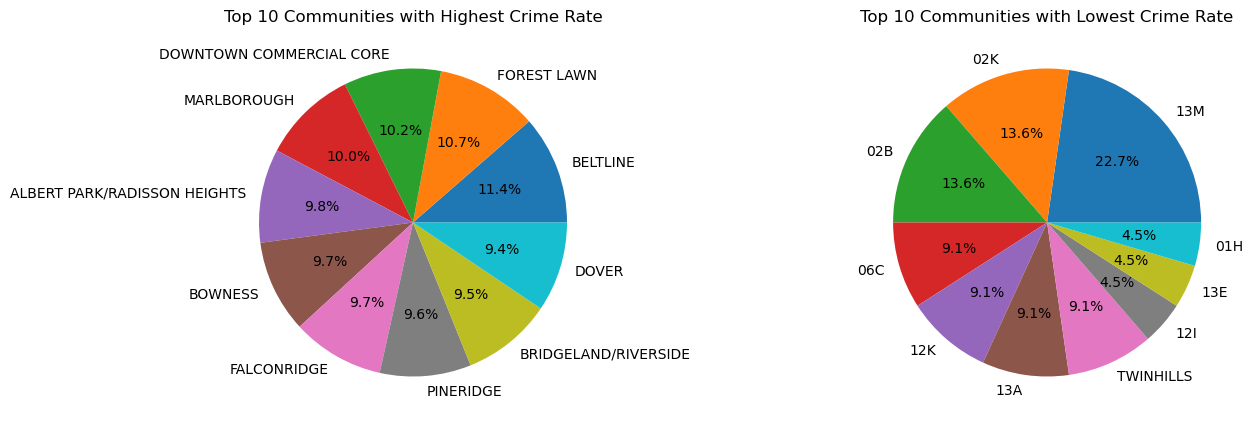

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')

Crime Category Distribution

Text(0, 0.5, '')

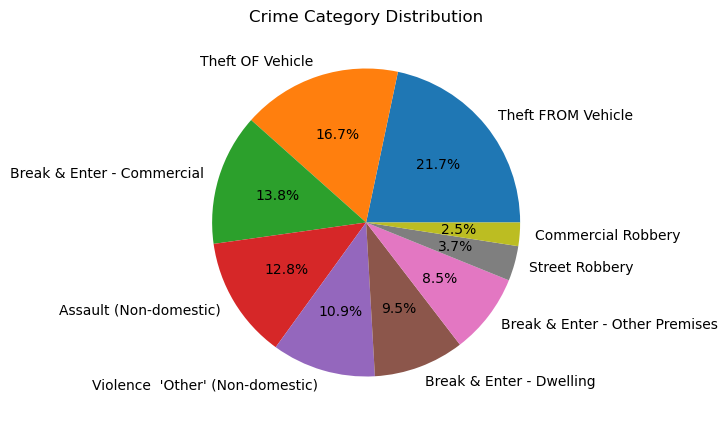

In [10]:
plt.figure(figsize=(5, 5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

This graph shows the distribution of crimes in each category by the number of crimes. The top crime category is Theft from Vehicle with 21.7% of the total crimes, followed by Theft of Vehicle with 16.7% and Break and Enter - Commercial with 13.8%. The least crime category inc;udes commerical or street robbery.

Crime Reportings Over the Years

Text(0.5, 1.0, 'Crime Reportings by Year')

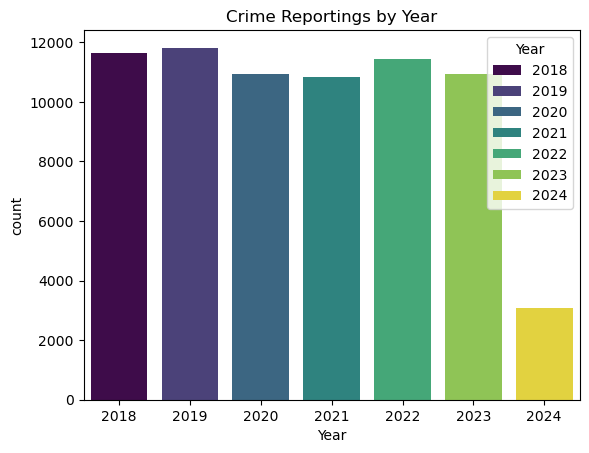

In [11]:
sns.countplot(x = 'Year', data = df, hue = 'Year', palette='viridis').set_title('Crime Reportings by Year')

This bar graph shows the distribution of number of crimes reported in the year. The year 2019 had the highest reportings of crimes followed by 2022 and 2018. The crime reportings in 2024 are less due to limited data till April 2024.

Crime Reportings by Month

Text(0.5, 1.0, 'Crime Reportings by Month')

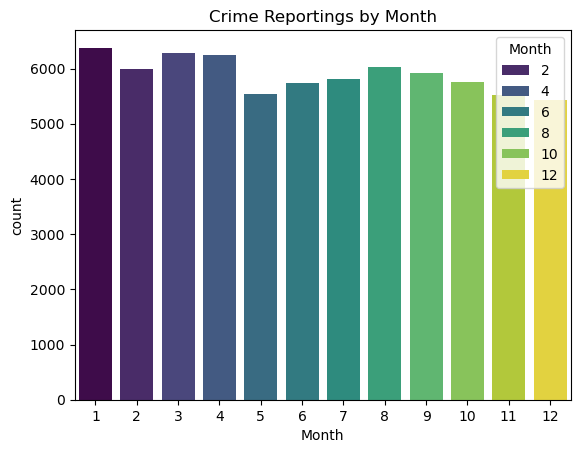

In [12]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette='viridis').set_title('Crime Reportings by Month')

Community and Category Analysis

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

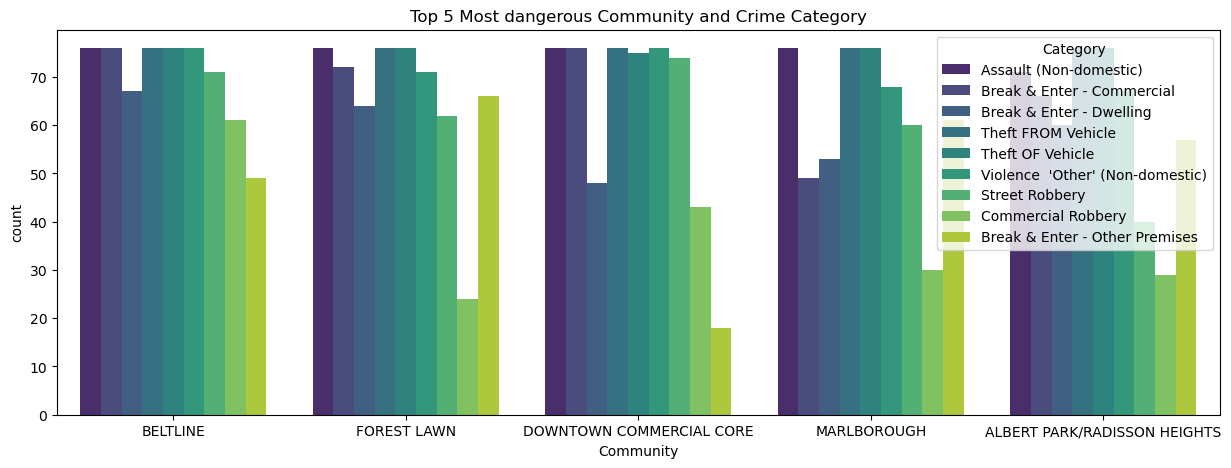

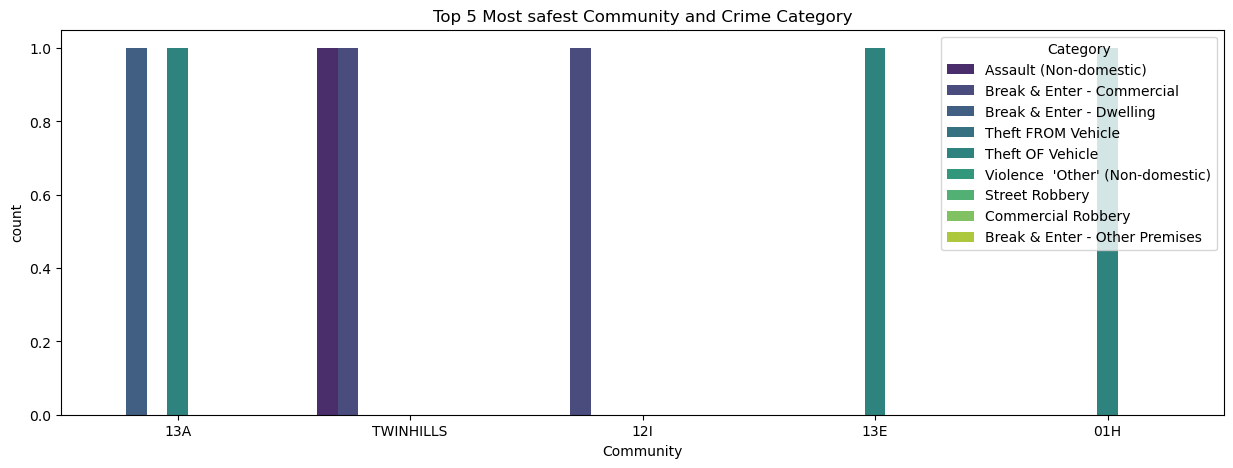

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

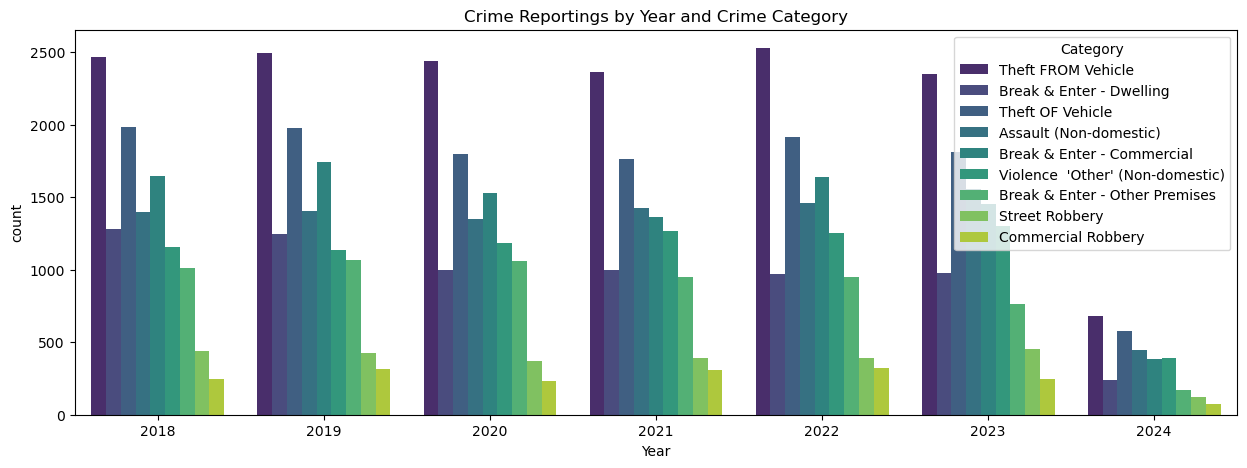

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

Month and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

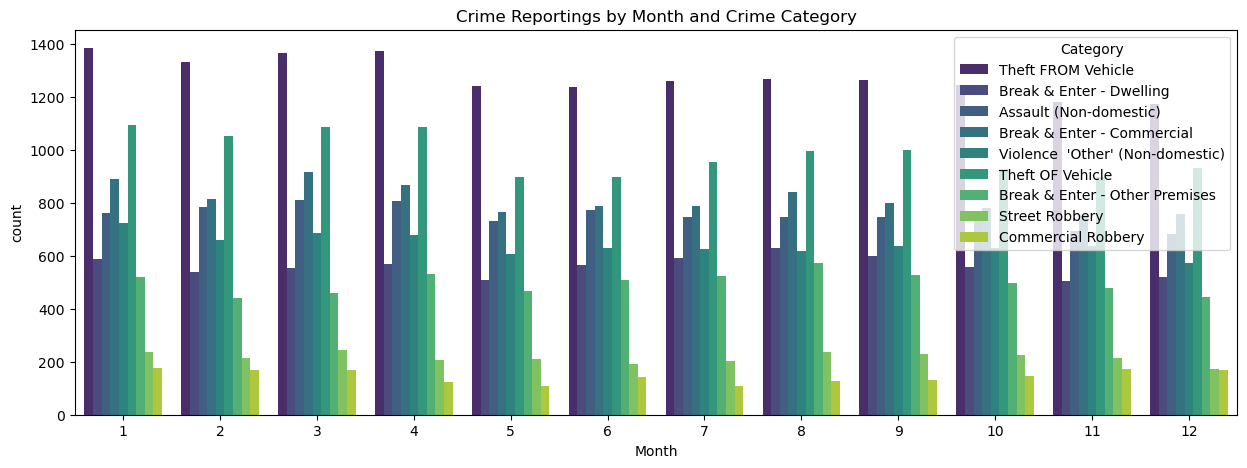

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

From the above, graphs, charts, and visualization I have studied the patterns, trends and relationships in the data. This will help me to build a better model for prediction.

Data Preprocessing Part 2

In [17]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#Object type columns
object_type_columns = df.select_dtypes(include='object').columns

#Label Encoding
for col in object_type_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


Building a Neural Network Model

In [18]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [19]:
seq_length = 3
X, y = create_sequences(df, seq_length)

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Building and Training the LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)

C:\Users\bandl\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 66.0955 - val_loss: 12.7463
Epoch 2/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 13.1899 - val_loss: 5.3756
Epoch 3/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 7.1128 - val_loss: 5.3344
Epoch 4/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.9582 - val_loss: 5.2373
Epoch 5/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 6.9538 - val_loss: 5.1552
Epoch 6/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.4603 - val_loss: 4.9057
Epoch 7/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 7.0034 - val_loss: 5.7403
Epoch 8/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.7084 - val_loss: 4.9739
Epoch 9/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.2266 - val_loss: 5.1661
Epoch 10/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.1768 - val_loss: 5.0516
Epoch 11/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.5250 - val_loss: 5.6939
Epoch 12/1

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')

Model Evaluation

Actual vs Predicted Values

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

Residual Plot

In [ ]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()